# Weather Data
This file converts raw reanalysis data FTPed from NOAA PSL lab into a dataframe of observations for Florida alone. Substantial visualization included along the way!

In [2]:
import numpy as np
import pandas as pd 
import xarray as xr 
import matplotlib.pyplot as plt

In [2]:
# open datasets
max_file = "/Volumes/T7/Weather_175/tmax/*.nc"
tmax = xr.open_mfdataset(max_file)

min_file = "/Volumes/T7/Weather_175/tmin/*.nc"
tmin = xr.open_mfdataset(min_file)

prec_file = "/Volumes/T7/Weather_175/prec/*.nc"
prec = xr.open_mfdataset(prec_file)

wind_file = "/Volumes/T7/Weather_175/wind/*.nc"
wind = xr.open_mfdataset(wind_file)

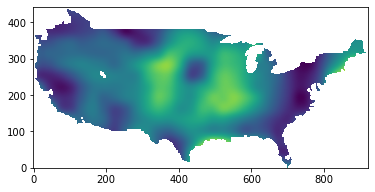

In [44]:
plt.imshow(np.array(wind.wind[5,:,:]), origin='lower')

In [5]:
# open insurance claims data 
df = pd.read_csv("/Users/julianschmitt/Documents/Schoolwork/Senior/STAT175/FimaNfipClaims.csv")

In [48]:
# cut to florida, regridding to insurance claims grid
# -87.63470035600356,24.51490854927549,-80.03257567895679,31.000809213282125

lon_new = np.arange(-87.7+360, -80+360, 0.1) 
lat_new = np.arange(24.5, 31, 0.1)


tmax_fl = tmax.reindex(lat=lat_new, lon=lon_new, method="nearest")
tmin_fl = tmin.reindex(lat=lat_new, lon=lon_new, method="nearest")
prec_fl = prec.reindex(lat=lat_new, lon=lon_new, method="nearest")
wind_fl = wind.reindex(lat=lat_new, lon=lon_new, method="nearest")


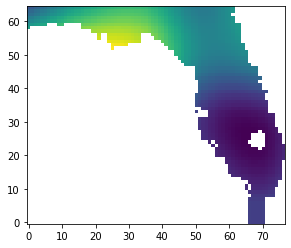

In [54]:
# check we've downsampled and cut to just florida 
plt.imshow(np.array(wind_fl.wind[0,:,:]), origin="lower")

In [64]:
# reformat to csv
tmax_fl.tmax.to_dataframe().to_csv("tmax_fl_ds.csv")

In [ ]:
tmin_fl.tmin.to_dataframe().to_csv("tmin_fl_ds.csv")

prec_fl.prec.to_dataframe().to_csv("prec_fl_ds.csv")

wind_fl.wind.to_dataframe().to_csv("wind_fl_ds.csv")

In [70]:
ds_all = xr.merge([tmax_fl, tmin_fl, prec_fl, wind_fl])

In [85]:
test = ds_all.sel(time = slice('1970-01-01', '1975-02-01')).to_dataframe()

In [87]:
test.reset_index()

,level_0,level_1,time,tmax,tmin,prec,wind
0,24.5,272.3,1970-01-01,NaN,NaN,NaN,NaN
1,24.5,272.3,1970-01-02,NaN,NaN,NaN,NaN
2,24.5,272.3,1970-01-03,NaN,NaN,NaN,NaN
3,24.5,272.3,1970-01-04,NaN,NaN,NaN,NaN
4,24.5,272.3,1970-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9299285,30.9,279.9,1975-01-28,NaN,NaN,NaN,NaN
9299286,30.9,279.9,1975-01-29,NaN,NaN,NaN,NaN
9299287,30.9,279.9,1975-01-30,NaN,NaN,NaN,NaN
9299288,30.9,279.9,1975-01-31,NaN,NaN,NaN,NaN


In [93]:
test2 = ds_all.to_dataframe().dropna().to_csv("full_florida_all_var.csv")

In [94]:
test3 = pd.read_csv("full_florida_all_var.csv")

In [97]:
test3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,tmax,tmin,prec,wind
0,24.5,278.9,1970-01-01,26.87,16.28,0.00,2.8969
1,24.5,278.9,1970-01-02,26.35,15.56,0.00,3.9144
2,24.5,278.9,1970-01-03,27.35,19.20,0.55,1.1705
3,24.5,278.9,1970-01-04,24.74,14.66,1.90,7.2902
4,24.5,278.9,1970-01-05,23.56,11.53,0.15,6.2500
...,...,...,...,...,...,...,...
22488435,30.9,278.4,2011-12-27,19.86,10.72,1.00,3.7435
22488436,30.9,278.4,2011-12-28,17.68,4.68,2.45,6.2775
22488437,30.9,278.4,2011-12-29,16.36,3.44,0.00,1.6753
22488438,30.9,278.4,2011-12-30,19.13,3.71,0.00,2.0369


In [99]:
test3.rename(columns = {"Unnamed: 0": "lat", "Unnamed: 1": "lon", "Unnamed: 2": "date"}).to_csv("full_florida_all_var2.csv")

In [3]:
test4 = pd.read_csv("full_florida_all_var2.csv")

In [4]:
test4

,Unnamed: 0,lat,lon,date,tmax,tmin,prec,wind
0,0,24.5,278.9,1970-01-01,26.87,16.28,0.00,2.8969
1,1,24.5,278.9,1970-01-02,26.35,15.56,0.00,3.9144
2,2,24.5,278.9,1970-01-03,27.35,19.20,0.55,1.1705
3,3,24.5,278.9,1970-01-04,24.74,14.66,1.90,7.2902
4,4,24.5,278.9,1970-01-05,23.56,11.53,0.15,6.2500
...,...,...,...,...,...,...,...,...
22488435,22488435,30.9,278.4,2011-12-27,19.86,10.72,1.00,3.7435
22488436,22488436,30.9,278.4,2011-12-28,17.68,4.68,2.45,6.2775
22488437,22488437,30.9,278.4,2011-12-29,16.36,3.44,0.00,1.6753
22488438,22488438,30.9,278.4,2011-12-30,19.13,3.71,0.00,2.0369


In [7]:
# load nc for elevation - final variable we want to add 
elev_nc = xr.open_mfdataset("/Users/julianschmitt/Downloads/elev.americas.5-min.nc")
elev_nc

/Users/julianschmitt/opt/anaconda3/envs/noaa/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/Users/julianschmitt/opt/anaconda3/envs/noaa/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/julianschmitt/opt/anaconda3/envs/noaa/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continu

<xarray.Dataset>
Dimensions:  (lat: 2161, lon: 1922, time: 1)
Coordinates:
  * lat      (lat) float32 90.0 89.92 89.83 89.75 ... -89.75 -89.83 -89.92 -90.0
  * lon      (lon) float32 170.0 170.1 170.2 170.2 ... 329.8 329.9 330.0 330.1
  * time     (time) object 0001-01-01 00:00:00
Data variables:
    data     (time, lat, lon) float32 dask.array<chunksize=(1, 2161, 1922), meta=np.ndarray>
Attributes:
    history:  \nTerrainBase (TBASE) global 5-minute ocean depth and land elev...

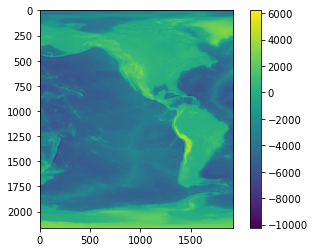

In [14]:
plt.imshow(elev_nc.data[0,:,:])
plt.colorbar();

In [37]:
lon_new = np.arange(-87.7+360, -80+360, 0.1) 
lat_new = np.arange(24.5, 31, 0.1)


elev_fl = elev_nc.reindex(lat=lat_new, lon=lon_new, method="nearest")

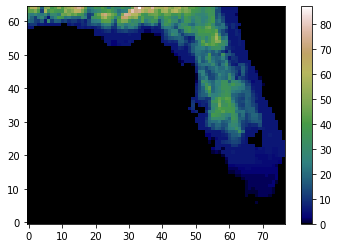

In [58]:
import matplotlib

cmap = matplotlib.cm.get_cmap('gist_earth')

plt.imshow(np.maximum(elev_fl.data[0,:,:], np.zeros(np.shape(elev_fl.data[0,:,:]))), origin="lower", cmap = cmap)
#plt.imshow(elev_fl.data[0,:,:], origin="lower", cmap = cmap)

plt.colorbar();

In [46]:
top_fl_df = elev_fl.to_dataframe().reset_index().rename(columns={"level_0":"lat", "level_1":"lon", "data":"elev"})[['lat', 'lon','elev']]

In [49]:
# merge into test dataframe
var5df = test4.drop(columns=["Unnamed: 0"]).merge(top_fl_df, on = ["lat", "lon"], how = "left")

In [59]:
var5df_cleaned = var5df.drop(var5df[var5df.elev < 0].index, inplace=False)

In [64]:
var5df_cleaned2 = var5df_cleaned.dropna()

In [65]:
# load response variable and merge 
df = pd.read_csv("/Users/julianschmitt/Documents/Schoolwork/Senior/STAT175/FimaNfipClaims.csv")

In [72]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'reportedCity', 'condominiumIndicator', 'policyCount', 'countyCode',
       'communityRatingSystemDiscount', 'dateOfLoss',
       'elevatedBuildingIndicator', 'elevationCertificateIndicator',
       'elevationDifference', 'censusTract', 'floodZone', 'houseWorship',
       'latitude', 'locationOfContents', 'longitude', 'lowestAdjacentGrade',
       'lowestFloorElevation', 'numberOfFloorsInTheInsuredBuilding',
       'nonProfitIndicator', 'obstructionType', 'occupancyType',
       'originalConstructionDate', 'originalNBDate',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'primaryResidence', 'id', 'basementEnclosureCrawlspace',
       'report

In [139]:
df2 = df[["latitude", "longitude", "dateOfLoss", "amountPaidOnBuildingClaim"]].rename(columns = 
                                                                                {"latitude":"lat", 
                                                                                 "longitude":"lon", 
                                                                                 "dateOfLoss":"date", 
                                                                                 "amountPaidOnBuildingClaim":"amount"})

In [140]:
from datetime import datetime
df2.date = [str(datetime.strptime(df2.date[i][0:10], "%Y-%M-%d").date()) for i in range(len(df2))]

In [107]:
df2["amount"] = df2["amount"].fillna(0)

In [127]:
# convert string datatypes
df2.loc['date'] = df2.loc['date'].astype("str")
var5df_cleaned2.loc['date'] = var5df_cleaned2.loc['date'].astype("str")

<ipython-input-127-e86246c409c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var5df_cleaned2.loc['date'] = var5df_cleaned2.loc['date'].astype("str")


In [175]:
# var5df_cleaned2[['lat','lon']] = pd.to_numeric(var5df_cleaned2[['lat','lon']])
var5df_cleaned3 = var5df_cleaned2.astype({"lat":float, "lon":float, "date": str, "tmax":float, "tmin":float, "wind":float, "elev":float})

In [199]:
df3 = df2.copy()
df3['lon'] = df3['lon']+360
df3 = df3.astype({"date":str})
df3 = df3.groupby(['lat', 'lon', 'date']).sum().reset_index()

In [218]:
lon_new = np.arange(-87.7+360, -80+360, 0.1) 
lat_new = np.arange(24.5, 31, 0.1)
test = df3[df3['lat'].isin(lat_new) & df3['lon'].isin(lon_new)] #(df3['date'].isin(np.array(var5df_cleaned3['date'])))

In [194]:
# perform merge so all data is in same dataframe
full_df = var5df_cleaned3.reset_index(drop=True).merge(df3.reset_index(drop=True), how="left", on=['lat', 'lon', 'date']) #.reset_index(drop=True)

In [188]:
var5df_cleaned3.to_csv("/Users/julianschmitt/Downloads/climate_x_data.csv")

In [189]:
df3.to_csv("/Users/julianschmitt/Downloads/claims_y.csv")